# 第３章 二つの変数の記述統計

In [8]:
# あとでいる。
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## 共分散
2つの変数間に直線的な関係性があるか表現する
$$
\frac{\Sigma (x-\bar{x})(y-\bar{y})}{n}
$$

In [130]:
x <- rnorm(3000,mean=60,sd=10)
y <- x + rnorm(3000,sd=100)

下記のコードは共分散をRの独自関数で作成したものです。

In [131]:
kyobunsan <- function(x,y){
    x_mean <- mean(x)
    y_mean <- mean(y)
    x_dev <- x - x_mean
    y_dev <- y - y_mean
    answer = 0
    for (i in 1:length(x)){
        seki <- x_dev[i]*y_dev[i]
        answer <- answer+seki
    }
    answer/length(x)
}

In [132]:
kyobunsan(x,y)
cov(x,y)

[1] 76.38878

[1] 76.41425

あれれ……おかしいなぁ。<br>
同じ共分散を計算したはずなのに数が違う.<br>
これは不偏共分散でn-1で割っているからです。


In [133]:
kyobunsan <- function(x,y){
    x_mean <- mean(x)
    y_mean <- mean(y)
    x_dev <- x - x_mean
    y_dev <- y - y_mean
    answer = 0
    for (i in 1:length(x)){
        seki <- x_dev[i]*y_dev[i]
        answer <- answer+seki
    }
    answer/(length(x)-1)
}

In [134]:
kyobunsan(x,y)
cov(x,y)

[1] 76.41425

[1] 76.41425

## 相関関係
共分散をxの標準偏差とyの標準偏差で割った数。<br>
-1~1の間の数で表現することができる。<br>
  
1に近ければ近いほど正の相関が強く、<br>
-1に近ければ近いほど負の相関が強く、<br>
0に近ければ近いほど相関が弱い。
$$
\frac{\Sigma (x-\bar{x})(y-\bar{y})}{\sqrt{\Sigma (x-\bar{x})^2}\sqrt{\Sigma (y-\bar{y})^2}}
$$

In [137]:
sokan <- function(x,y){
    x_mean <- mean(x)
    y_mean <- mean(y)
    x_dev <- x - x_mean
    y_dev <- y - y_mean
    answer = 0
    for (i in 1:length(x)){
        seki <- x_dev[i]*y_dev[i]
        answer <- answer+seki
    }
    covar = answer/length(x)
    covar/sd(x)/sd(y) # ここのsdは不偏分散。けど書くの面倒だなぁ……
}

In [138]:
sokan(x,y)
cor(x,y)

[1] 0.07515772

[1] 0.07518279

相関を可視化しよう。

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.68   53.01   60.26   59.36   66.05   85.41 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2004.39   -40.72   506.28   545.79  1158.25  3771.33 

[1] 1338.797

[1] 0.1450255

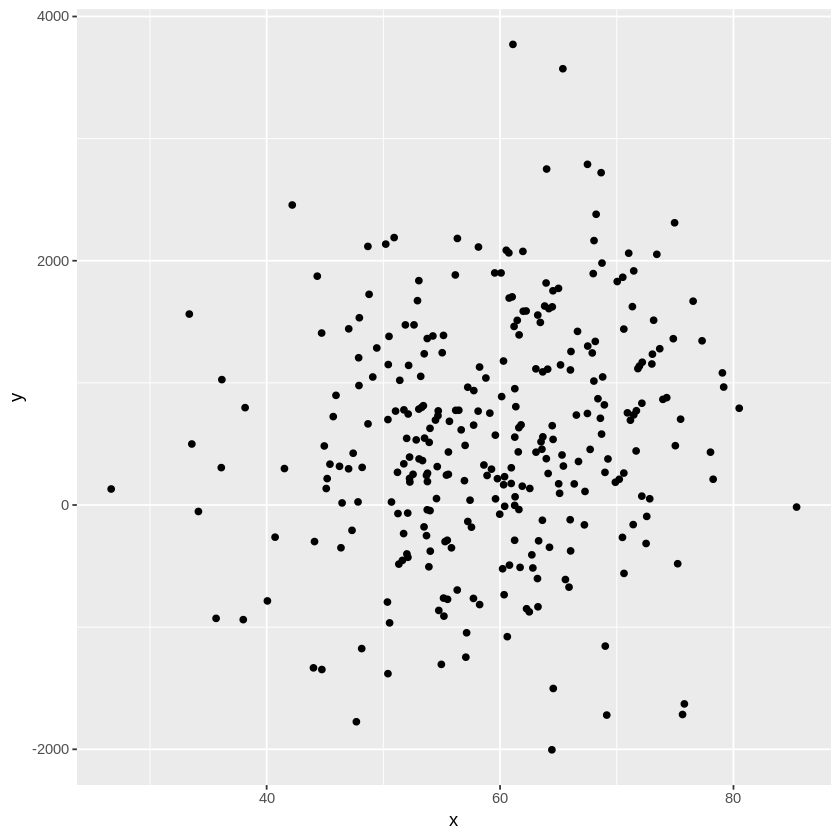

In [22]:
x <- rnorm(300,mean = 60,sd=10)
summary(x)
y <- 10*x + rnorm(300,sd=1000) #散らばり具合はココのsdが支配してたりする。
summary(y)

cov(x,y)
cor(x,y)
library(ggplot2)
qplot(x,y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.96   53.41   60.83   60.24   67.11   89.28 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  348.8   535.6   600.7   601.1   673.7   887.4 

[1] 1059.778

[1] 0.9945496

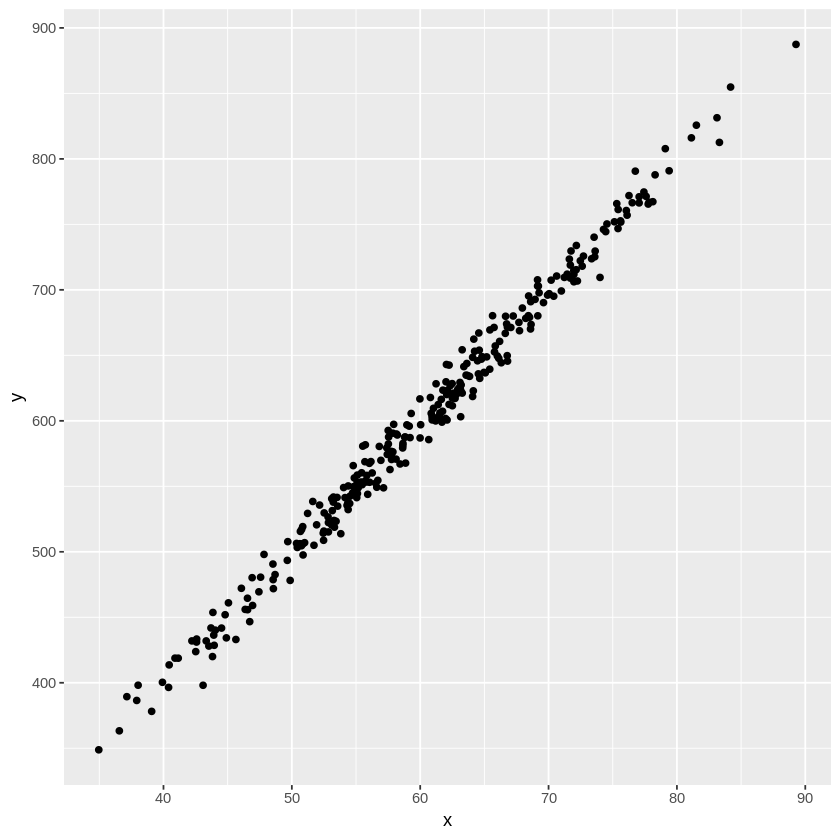

In [13]:
x <- rnorm(300,mean = 60,sd=10)
summary(x)
y <- 10*x + rnorm(300,sd=10)
summary(y)

cov(x,y)
cor(x,y)
library(ggplot2)
qplot(x,y)

こんなこともありえます。<br>
二つの変数は強い関係性(因果関係)を持っていますが、相関係数は非常に低い。

[1] 234.3659

[1] 0.1722908

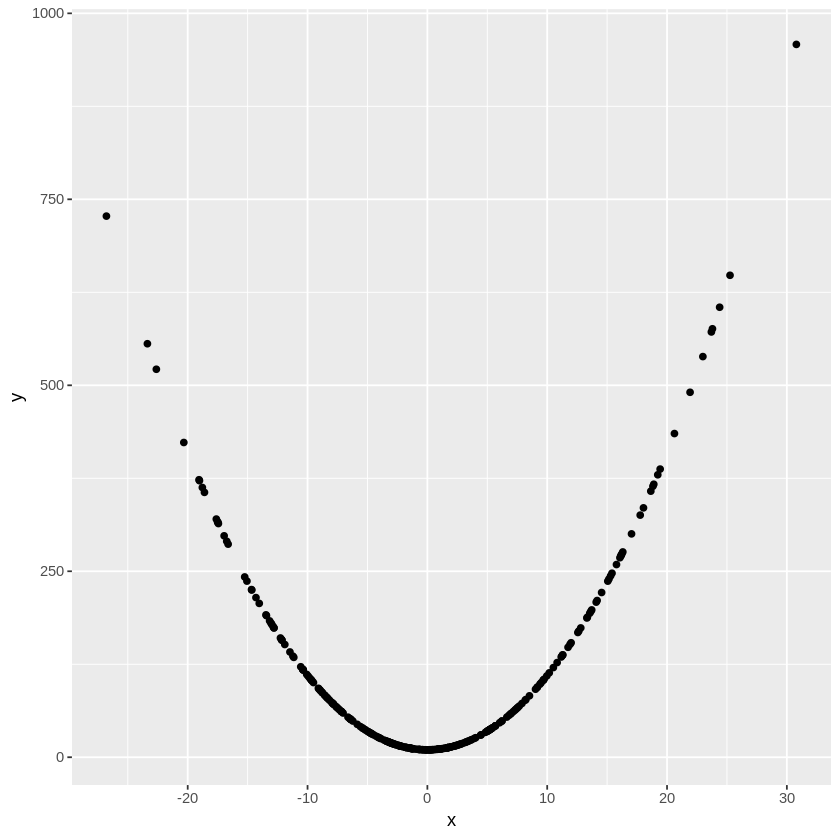

In [21]:
x <- rnorm(300  , sd=10)
y <- x^2 +10
cov(x,y)
cor(x,y)
qplot(x,y)

### (因果関係と相関関係は別物なのでお気をつけください)